In [23]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#read the dataset and store it in a variable
data = pd.read_csv('heart.csv')

In [5]:
#Print the first 5 rows of dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#print the information/ dtypes realted to each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Calculate the null values
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


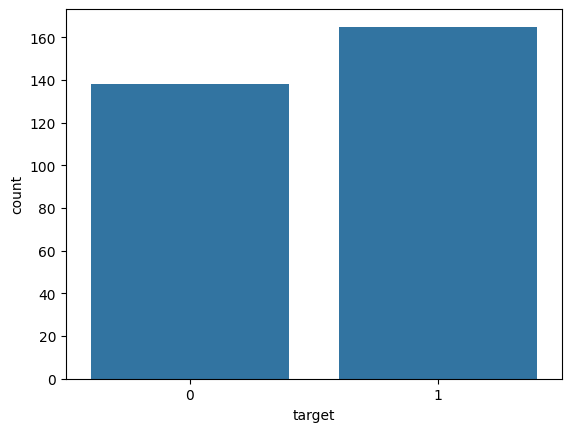

In [45]:
# target = 1 means heart disease present
# target = 0 means no heart disease
sns.countplot(x="target", data=data)

# Display the plot
plt.show()

In [25]:
#Split the data in 2 Variables, in X(everything except for prediction column), Y(prediction column)
X = data.drop('target', axis=1)
y = data['target']

In [35]:
#Split the data for training & Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# List of continuous (numeric) features that we want to scale
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# Import StandardScaler from sklearn, which standardizes features & Create an instance of scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training set continuous columns and transform them, this subtracts the mean and divides by standard deviation for each feature
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
# Transform the test set using the same scaler parameters learned from training data, we do not fit again on test data to avoid data leakage
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

In [40]:
#Import Decision tree algorithm & other needed metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Create an instance of Decsion tree classifier model
dt_model = DecisionTreeClassifier()
#provide data to model
dt_model.fit(X_train, y_train)
#store the prediction in predict
dt_pred = dt_model.predict(X_test)

In [41]:
#Import Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression
#Create an instance of Logistic Regression model
lr_model = LogisticRegression()
#provide data to model
lr_model.fit(X_train, y_train)
#store the prediction in predict
lr_pred = lr_model.predict(X_test)

In [42]:
#Print accuracy of both models
print("Decision Tree Accuracy: ", accuracy_score(y_test, dt_pred))
print("Logistic Regression Accuracy: ", accuracy_score(y_test, lr_pred))

Decision Tree Accuracy:  0.8360655737704918
Logistic Regression Accuracy:  0.8688524590163934


In [43]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [44]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



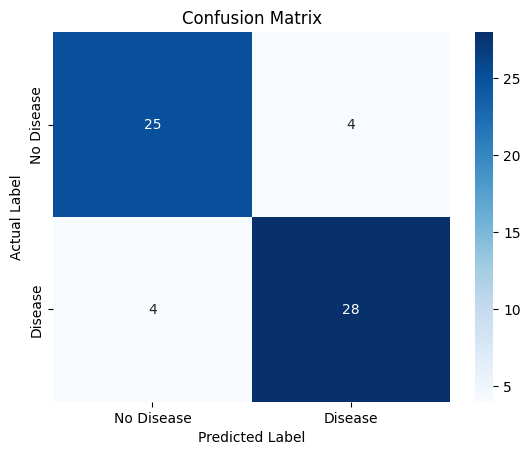

In [47]:
# Generate confusion matrix using actual and predicted values for Logistic regression model
cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap for better understanding
sns.heatmap(
    cm,
    annot=True, # Display values inside cells
    fmt="d",     # Format numbers as integers
    cmap="Blues",  # Color theme
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")

# Display the heatmap
plt.show()

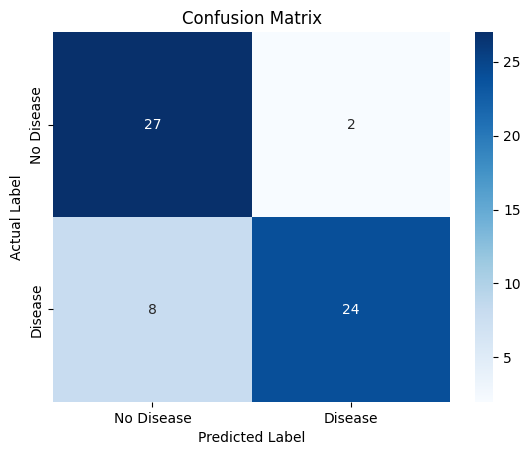

In [48]:
# Generate confusion matrix using actual and predicted values for decision tree model
cm = confusion_matrix(y_test, dt_pred)

# Create a heatmap for better understanding
sns.heatmap(
    cm,
    annot=True,              # Display values inside cells
    fmt="d",                 # Format numbers as integers
    cmap="Blues",            # Color theme
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")

# Display the heatmap
plt.show()